In [1]:
import nltk

In [2]:
from nltk.corpus import twitter_samples

In [4]:
import matplotlib.pyplot as plt

In [5]:
import random

In [8]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /home/muzammil/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [9]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')

In [12]:
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [13]:
print('Number of positive tweets: ',len(all_positive_tweets))
print('Number of negative tweets: ',len(all_negative_tweets))
print('The type of tweet entry is ',type(all_negative_tweets[0]))

Number of positive tweets:  5000
Number of negative tweets:  5000
The type of tweet entry is  <class 'str'>


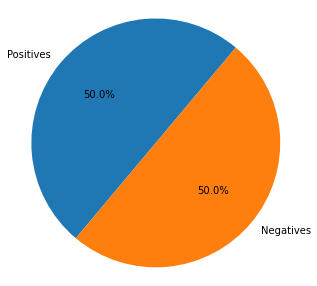

In [18]:
fig = plt.figure(figsize=(5,5))
labels = 'Positives','Negatives'
sizes = [len(all_positive_tweets),len(all_negative_tweets)]
plt.pie(sizes,labels=labels,autopct="%1.1f%%",shadow=False,startangle=50)
plt.axis('equal')
plt.show()

In [20]:
print('\033[92m' + all_positive_tweets[random.randint(0,5000)])
print('\033[91m' + all_negative_tweets[random.randint(0,5000)])

@BANGMELIAMM fback? :)
@junghooked @BTS_twt of course!! i dont think he'll take it seriously omg how nice if he saw this :-((


In [21]:
tweet = all_positive_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/muzammil/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
import re
import string

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

In [24]:
tweet2 = re.sub(r'^RT[\s]+','',tweet)
print(tweet)
print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i
My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [25]:
tweet2 = re.sub(r'#','',tweet2)

In [26]:
print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… https://t.co/3tfYom0N1i


In [27]:
tweet2 = re.sub(r'https?:\/\/.*[\r\n]*','',tweet2)

In [28]:
print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


In [29]:
tokenizer = TweetTokenizer(preserve_case=False,strip_handles=True,reduce_len=True)
tweet_tokens = tokenizer.tokenize(tweet2)

In [30]:
print(tweet_tokens)

['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


In [34]:
stopwords_english = stopwords.words('english')
print(len(stopwords_english))
print(len(string.punctuation))

179
32


In [35]:
tweets_clean = []
for word in tweet_tokens:
    if word not in stopwords_english and word not in string.punctuation:
        tweets_clean.append(word)

In [36]:
print(tweets_clean)

['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


In [37]:
stemmer = PorterStemmer()
tweets_stem = []
for word in tweets_clean:
    stem_word = stemmer.stem(word)
    tweets_stem.append(stem_word)

In [38]:
print(tweets_stem)

['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


In [39]:
import numpy as np

In [40]:
tweets = all_negative_tweets+all_positive_tweets

In [41]:
print(len(tweets))

10000


In [44]:
labels = np.append(np.zeros(len(all_negative_tweets)),np.ones((5000)))

In [45]:
labels

array([0., 0., 0., ..., 1., 1., 1.])